<a href="https://colab.research.google.com/github/ahcamachod/1918-machine-learning-clasificacion-con-sklearn/blob/proyecto-final/ML_clasificacion_con_SKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 5: Dummy classifiers y árboles de decisión.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

uri = 'docs/car_prices.csv'
#uri = 'https://gist.githubusercontent.com/ahcamachod/1595316a6b37bf39baac355b081d9c3b/raw/98bc94de744764cef0e67922ddfac2a226ad6a6f/car_prices.csv'

datos = pd.read_csv(uri)
datos.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [2]:
mapa = {
        'Unnamed: 0':'idCar',
        'mileage_per_year':'millas_por_ano',
        'model_year':'ano_del_modelo',
        'price':'precio',
        'sold':'vendido'
        }

datos = datos.rename(columns=mapa)
datos.sample(3)

,idCar,millas_por_ano,ano_del_modelo,precio,vendido
9280,9280,21944,2002,99899.91,no
1408,1408,14542,1998,39918.35,yes
8631,8631,15498,2004,60441.11,no


In [3]:
cambio = {'no':0, 'yes':1}

datos.vendido = datos.vendido.map(cambio)
datos.sample(3)

,idCar,millas_por_ano,ano_del_modelo,precio,vendido
3329,3329,15800,2004,34847.66,1
4507,4507,8694,2000,65161.02,0
945,945,15027,2004,45297.62,1


In [4]:
from datetime import datetime

ano_actual = datetime.today().year
datos['edad_del_modelo'] = ano_actual - datos.ano_del_modelo
datos.sample(3)

,idCar,millas_por_ano,ano_del_modelo,precio,vendido,edad_del_modelo
5587,5587,8832,1998,79157.96,0,25
1932,1932,16004,1999,50423.86,1,24
8238,8238,8121,2008,61215.80,1,15


In [5]:
datos['km_por_ano'] = datos.millas_por_ano * 1.60934
datos.sample(3)

,idCar,millas_por_ano,ano_del_modelo,precio,vendido,edad_del_modelo,km_por_ano
9721,9721,17179,1999,83013.47,0,24,27646.85186
9398,9398,17090,2013,45926.77,1,10,27503.62060
8182,8182,9499,2011,77344.72,1,12,15287.12066


In [6]:
datos = datos.drop(columns=['idCar', 'millas_por_ano','ano_del_modelo'], axis=1)
datos.sample(3)

,precio,vendido,edad_del_modelo,km_por_ano
9665,111418.77,0,10,29845.21030
7365,37082.18,1,23,14789.83460
7800,100297.78,1,25,25638.39554


In [7]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler#trae todos los datos a una misma escala

x= datos[['edad_del_modelo','km_por_ano', 'precio']]
y= datos.vendido

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(raw_x_train)} elementos y probaremos con {len(raw_x_test)} elementos.")

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 7500 elementos y probaremos con 2500 elementos.
La tasa de acierto fue de: 76.04%


In [8]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='stratified')
dummy.fit(x_train,y_train)
exactitud = dummy.score(x_test,y_test)*100
print(f'La exactitud del clasificador Dummy stratified fue: {round(exactitud,2)}%')

La exactitud del clasificador Dummy stratified fue: 52.64%


In [9]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(x_train,y_train)
exactitud = dummy.score(x_test,y_test)*100
print(f'La exactitud del clasificador Dummy most_frequent fue: {round(exactitud,2)}%')

La exactitud del clasificador Dummy most_frequent fue: 58.0%


In [10]:
# Usando StandardScaler()

from sklearn.tree import DecisionTreeClassifier

x= datos[['edad_del_modelo','km_por_ano', 'precio']]
y= datos.vendido

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(raw_x_train)} elementos y probaremos con {len(raw_x_test)} elementos.")

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 7500 elementos y probaremos con 2500 elementos.
La tasa de acierto fue de: 78.04%


In [11]:
# Sin estandarizar

from sklearn.tree import DecisionTreeClassifier

x= datos[['edad_del_modelo','km_por_ano', 'precio']]
y= datos.vendido

SEED = 42
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos.")

model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 7500 elementos y probaremos con 2500 elementos.
La tasa de acierto fue de: 78.04%


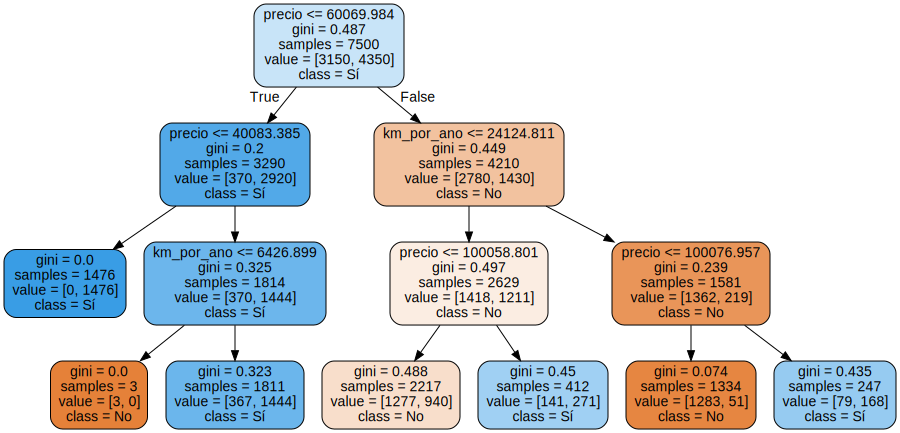

In [12]:
from sklearn.tree import export_graphviz
import graphviz
#pip install --upgrade graphviz

features = x.columns
dot_data = export_graphviz(model, feature_names=features, filled=True, rounded=True, class_names=['No','Sí'])
grafico = graphviz.Source(dot_data)
grafico